## **Important Imports**

In [88]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Imports
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score

import joblib

### **Dataset Import and Familiarization**

In [89]:
TrainDataSet = pd.read_csv('./datasets/train_kaggle.csv')

TrainDataSet.info()

C:\Users\Acer\AppData\Local\Temp\ipykernel_49156\1880558860.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  TrainDataSet = pd.read_csv('./datasets/train_kaggle.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB


In [90]:
TrainDataSet.describe

<bound method NDFrame.describe of         Customer_ID outlet_city luxury_sales fresh_sales dry_sales  \
0        10493832.0    Kelaniya       1209.6       756.0    5292.0   
1        10178643.0    Moratuwa      1590.12     1060.08   6007.12   
2        10513916.0     Wattala      2288.88     1481.04   9155.52   
3        10334589.0     Wattala      2274.94     1739.66   9099.76   
4        10458365.0    Kelaniya      2345.49     2069.55   9243.99   
...             ...         ...          ...         ...       ...   
774150   10197979.0     Gampaha       3893.4      3893.4   3448.44   
774151   10494575.0  Katunayake      6095.86     5557.99   6275.15   
774152   10565682.0     Colombo      5121.42     4820.16   4669.53   
774153   10351977.0       Kandy      6311.76     6311.76   5940.48   
774154   10637635.0     Negombo       5833.5     6027.95    6611.3   

       cluster_catgeory  
0                     4  
1                     1  
2                     4  
3                    

### **Preprocessing**   

In [91]:
print(f'Before Cleaning the Sales Column {TrainDataSet.isnull().sum()}')

# Check for missing values
TrainDataSet[['luxury_sales', 'fresh_sales', 'dry_sales']] = TrainDataSet[['luxury_sales', 'fresh_sales', 'dry_sales']].fillna(0)

print(f'\nAfter Cleaning the Sales Column {TrainDataSet.isnull().sum()}')
print("\n\nCan clearly see after cleaning the Sales Column, there are no missing values in those numerical columns")

Before Cleaning the Sales Column Customer_ID          2
outlet_city          2
luxury_sales        35
fresh_sales         41
dry_sales           30
cluster_catgeory     1
dtype: int64

After Cleaning the Sales Column Customer_ID         2
outlet_city         2
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_catgeory    1
dtype: int64


Can clearly see after cleaning the Sales Column, there are no missing values in those numerical columns


In [92]:
TrainDataSet.dropna(inplace=True)

TrainDataSet.isnull().sum()

print("For categorical columns, we will just drop the rows with missing values because they are very few and imputing them will change the data distribution")

For categorical columns, we will just drop the rows with missing values because they are very few and imputing them will change the data distribution


In [93]:
# Data type correction
# Assuming TrainDataSet is your DataFrame and 'sales' is the column name
# Convert non-numeric values to NaN for multiple columns
TrainDataSet[['luxury_sales', 'fresh_sales', 'dry_sales']] = TrainDataSet[['luxury_sales', 'fresh_sales', 'dry_sales']].apply(pd.to_numeric, errors='coerce')

# Convert the columns to float
TrainDataSet[['luxury_sales', 'fresh_sales', 'dry_sales']] = TrainDataSet[['luxury_sales', 'fresh_sales', 'dry_sales']].astype(float)

TrainDataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774150 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774150 non-null  float64
 1   outlet_city       774150 non-null  object 
 2   luxury_sales      774140 non-null  float64
 3   fresh_sales       774141 non-null  float64
 4   dry_sales         774142 non-null  float64
 5   cluster_catgeory  774150 non-null  object 
dtypes: float64(4), object(2)
memory usage: 41.3+ MB


### **Data type conversion**

In [94]:
# Replace NaN values with 0
TrainDataSet.replace({'luxury_sales': {np.nan: 0}, 'fresh_sales': {np.nan: 0}, 'dry_sales': {np.nan: 0}}, inplace=True)

# Convert the columns to float
TrainDataSet[['luxury_sales', 'fresh_sales', 'dry_sales']] = TrainDataSet[['luxury_sales', 'fresh_sales', 'dry_sales']].astype(float)

# Display information about the DataFrame
TrainDataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774150 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774150 non-null  float64
 1   outlet_city       774150 non-null  object 
 2   luxury_sales      774150 non-null  float64
 3   fresh_sales       774150 non-null  float64
 4   dry_sales         774150 non-null  float64
 5   cluster_catgeory  774150 non-null  object 
dtypes: float64(4), object(2)
memory usage: 41.3+ MB


In [95]:
# Duplicate Check
TrainDataSet.duplicated().sum()

if TrainDataSet.duplicated().sum() > 0:
    print("There are duplicate rows in the dataset")
    TrainDataSet.drop_duplicates(inplace=True)
    print("Duplicate rows have been removed")
else:
    print("There are no duplicate rows in the dataset")

There are no duplicate rows in the dataset


### **Encoding outlet_city column**

In [96]:
# One Hot Encoding
TrainDataSet = pd.get_dummies(TrainDataSet, columns=['outlet_city'])

# # Copy the target column
Target = TrainDataSet['cluster_catgeory']

# Drop the original target column from TrainDataSet
TrainDataSet.drop(['cluster_catgeory'], axis=1, inplace=True)

# Concatenate the target column to the end of TrainDataSet
TrainDataSet['cluster_catgeory'] = Target

# Display information about the dataset
TrainDataSet.head(20)

,Customer_ID,luxury_sales,fresh_sales,dry_sales,outlet_city_Batticaloa,outlet_city_Colombo,outlet_city_Dehiwala-Mount Lavinia,outlet_city_Galle,outlet_city_Gampaha,outlet_city_Homagama,...,outlet_city_Kelaniya,outlet_city_Kotte,outlet_city_Moratuwa,outlet_city_Negombo,outlet_city_Nuwara Eliya,outlet_city_Panadura,outlet_city_Peliyagoda,outlet_city_Trincomalee,outlet_city_Wattala,cluster_catgeory
0,10493832.0,1209.60,756.00,5292.00,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,4
1,10178643.0,1590.12,1060.08,6007.12,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,10513916.0,2288.88,1481.04,9155.52,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
3,10334589.0,2274.94,1739.66,9099.76,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
4,10458365.0,2345.49,2069.55,9243.99,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,4
5,10654823.0,1661.00,913.55,5564.35,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
6,10603456.0,1544.96,908.80,6270.72,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
7,10382219.0,2120.96,1325.60,9279.20,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,4
8,10473125.0,1092.80,1024.50,4644.40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
9,10751172.0,2390.20,1673.14,7887.66,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4


In [97]:
TrainDataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774150 entries, 0 to 774154
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Customer_ID                         774150 non-null  float64
 1   luxury_sales                        774150 non-null  float64
 2   fresh_sales                         774150 non-null  float64
 3   dry_sales                           774150 non-null  float64
 4   outlet_city_Batticaloa              774150 non-null  uint8  
 5   outlet_city_Colombo                 774150 non-null  uint8  
 6   outlet_city_Dehiwala-Mount Lavinia  774150 non-null  uint8  
 7   outlet_city_Galle                   774150 non-null  uint8  
 8   outlet_city_Gampaha                 774150 non-null  uint8  
 9   outlet_city_Homagama                774150 non-null  uint8  
 10  outlet_city_Jaffna                  774150 non-null  uint8  
 11  outlet_city_Kaduwela      

## **Target Variable Analysis**

In [98]:
# Convert strings to numeric (excluding unusual entries)
y_train_numeric = pd.to_numeric(TrainDataSet['cluster_catgeory'], errors='coerce')

# Remove NaNs resulting from conversion
y_train_numeric = y_train_numeric[~np.isnan(y_train_numeric)]

# Ensure consistent data type (optional)
y_train_numeric = y_train_numeric.astype(int)

# Replace the 'cluster_catgeory' column in TrainDataSet with the cleaned numeric values
TrainDataSet['cluster_catgeory'] = y_train_numeric

# Get unique values
unique_classes = y_train_numeric.unique()

# Print error values and their counts
for value in unique_classes:
    count = (y_train_numeric == value).sum()
    print(f"Value: {value}, Count: {count}")


Value: 4, Count: 172439
Value: 1, Count: 188980
Value: 99, Count: 1
Value: 2, Count: 155064
Value: 5, Count: 39540
Value: 3, Count: 48907
Value: 6, Count: 169214
Value: 95, Count: 1
Value: 98, Count: 1
Value: 100, Count: 1
Value: 89, Count: 1


In [99]:
# Define the list of outlier values
outliers = [1, 2, 3, 4, 5 , 6]

# Filter out rows with outlier values from 'cluster_catgeory'
TrainDataSet = TrainDataSet[TrainDataSet['cluster_catgeory'].isin(outliers)]

# Drop rows with NaN values in the 'cluster_catgeory' column
TrainDataSet.dropna(subset=['cluster_catgeory'], inplace=True)

# Get unique values
unique_classes = TrainDataSet['cluster_catgeory'].unique()

# Print unique values and their counts
for value in unique_classes:
    count = (TrainDataSet['cluster_catgeory'] == value).sum()
    print(f"Value: {value}, Count: {count}")


Value: 4.0, Count: 172439
Value: 1.0, Count: 188980
Value: 2.0, Count: 155064
Value: 5.0, Count: 39540
Value: 3.0, Count: 48907
Value: 6.0, Count: 169214


#### we had to classify the sales of the outlets into six categories, so we dropped all the rows with target outliers and extracted the main 6 categories from the target variable.

### **Saving the preprocessed data**

In [100]:
# Save the cleaned dataset
TrainDataSet.to_csv('./datasets/train_kaggle_cleaned.csv', index=False)

# Load the cleaned dataset
TrainDataSet = pd.read_csv('./datasets/train_kaggle_cleaned.csv')

## **Training the model**

In [101]:
X = TrainDataSet.drop(['cluster_catgeory' , 'Customer_ID'], axis=1)
y = TrainDataSet['cluster_catgeory'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.02 , random_state=42)

print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (758661, 23)
Shape of y_train: (758661,)
Shape of X_test: (15483, 23)
Shape of y_test: (15483,)


## **Logistic Regression**

In [102]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver='lbfgs', max_iter=250)
LR.fit(X_train , y_train)

c:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=250)

### **Pefromance Metrics**

In [103]:
LR_predicted = LR.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, LR_predicted)
print("Accuracy:", accuracy)

# Calculate cross-validated accuracy scores
LR_scores = cross_val_score(LR, X_train, y_train, cv=5, scoring="accuracy")
print("Cross-validated Accuracy Scores:", LR_scores)
print("Mean Accuracy:", LR_scores.mean())

Accuracy: 0.9436801653426339


c:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Cross-validated Accuracy Scores: [0.9442178  0.94442174 0.94400654 0.9443822  0.94412517]
Mean Accuracy: 0.9442306906680151


c:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

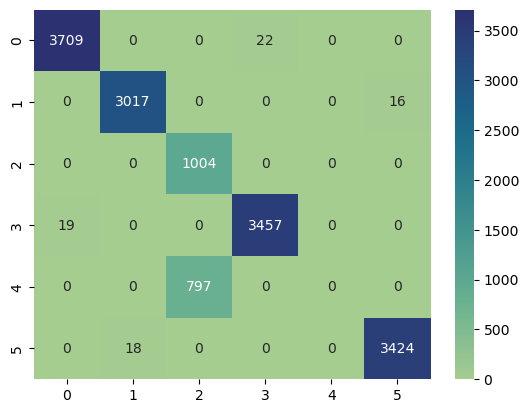

In [104]:
sns.heatmap(confusion_matrix(y_test, LR_predicted) , annot=True , cmap='crest' , fmt='g')

In [105]:
print(classification_report(y_test, LR_predicted))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99      3731
           2       0.99      0.99      0.99      3033
           3       0.56      1.00      0.72      1004
           4       0.99      0.99      0.99      3476
           5       0.00      0.00      0.00       797
           6       1.00      0.99      1.00      3442

    accuracy                           0.94     15483
   macro avg       0.76      0.83      0.78     15483
weighted avg       0.91      0.94      0.93     15483



c:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Saving the model**

In [106]:
# Dowload the model
joblib.dump(LR, './models/logistic_regression_model.pkl')

['./models/logistic_regression_model.pkl']

## **Random Forest Classifier**

In [107]:
from sklearn.ensemble import RandomForestClassifier 

RF_Clf = RandomForestClassifier(n_estimators=100 , random_state=42)
RF_Clf.fit(X_train , y_train)

### **Pefromance Metrics**

In [ ]:
RF_Predicted = RF_Clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, RF_Predicted)
print("Accuracy:", accuracy)

# Calculate cross-validated accuracy scores
RF_scores = cross_val_score(RF_Clf, X_train, y_train, cv=5, scoring="accuracy")
print("Cross-validated Accuracy Scores:", RF_scores)
print("Mean Accuracy:", RF_scores.mean())

Accuracy: 0.9998708260672996
Cross-validated Accuracy Scores: [0.99978251 0.99982205 0.99974956 0.9997232  0.99975615]
Mean Accuracy: 0.9997666941943523


<Axes: >

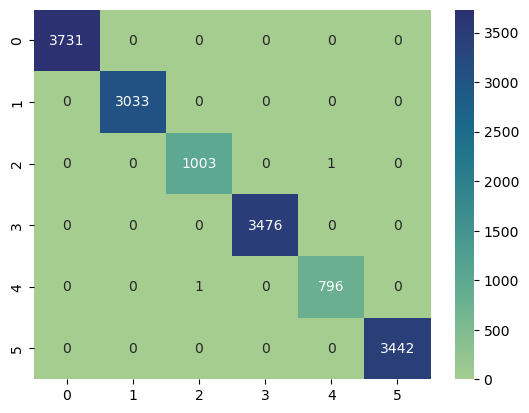

In [ ]:
sns.heatmap(confusion_matrix(y_test, RF_Predicted) , annot=True , cmap='crest' , fmt='d')

In [ ]:
print(classification_report(y_test, RF_Predicted))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3731
           2       1.00      1.00      1.00      3033
           3       1.00      1.00      1.00      1004
           4       1.00      1.00      1.00      3476
           5       1.00      1.00      1.00       797
           6       1.00      1.00      1.00      3442

    accuracy                           1.00     15483
   macro avg       1.00      1.00      1.00     15483
weighted avg       1.00      1.00      1.00     15483



### **Saving the model**

In [ ]:
# Dowload the model
joblib.dump(RF_Clf, './models/random_forest_model.pkl')

## **Support Vector Machine**

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

### **Pefromance Metrics**

In [ ]:
SGD_Predicted = sgd_clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, SGD_Predicted)
print("Accuracy:", accuracy)

# Calculate cross-validated accuracy scores
SGD_scores = cross_val_score(sgd_clf, X_train, y_train, cv=5, scoring="accuracy")
print("Cross-validated Accuracy Scores:", SGD_scores)
print("Mean Accuracy:", SGD_scores.mean())

In [ ]:
sns.heatmap(confusion_matrix(y_test, SGD_Predicted) , annot=True , cmap='crest' , fmt='d')

In [ ]:
print(classification_report(y_test, SGD_Predicted))

### **Saving the model**

In [ ]:
## Dowload the model
joblib.dump(sgd_clf, './models/sgd_model.pkl')

## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

### **Pefromance Metrics**

In [ ]:
KNN_Predicted = knn_clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, KNN_Predicted)
print("Accuracy:", accuracy)

# Calculate cross-validated accuracy scores
KNN_scores = cross_val_score(knn_clf, X_train, y_train, cv=5, scoring="accuracy")
print("Cross-validated Accuracy Scores:", KNN_scores)
print("Mean Accuracy:", KNN_scores.mean())

In [ ]:
sns.heatmap(confusion_matrix(y_test, KNN_Predicted) , annot=True , cmap='crest' , fmt='d')

In [ ]:
print(classification_report(y_test, KNN_Predicted))

### **Saving the model**

In [ ]:
# Dowload the model
joblib.dump(knn_clf, './models/knn_model.pkl')

## **XGBoost**

In [ ]:
# xgboost
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)

### **Pefromance Metrics**


In [ ]:
XGB_Predicted = xgb_clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, XGB_Predicted)
print("Accuracy:", accuracy)

# Calculate cross-validated accuracy scores
XGB_scores = cross_val_score(xgb_clf, X_train, y_train, cv=5, scoring="accuracy")
print("Cross-validated Accuracy Scores:", XGB_scores)
print("Mean Accuracy:", XGB_scores.mean())

In [ ]:
sns.heatmap(confusion_matrix(y_test, XGB_Predicted) , annot=True , cmap='crest' , fmt='d')

In [ ]:
print(classification_report(y_test, XGB_Predicted))

### **Saving the model**

In [ ]:
# Dowload the model
joblib.dump(xgb_clf, './models/xgb_model.pkl')

## **VOting Classifier**

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('lr', LR), ('rf', RF_Clf), ('sgd', sgd_clf), ('xgb', xgb_clf), ('knn', knn_clf)]
)

voting_clf.fit(X_train, y_train)

In [ ]:
VOTING_predicted = voting_clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, VOTING_predicted)
print("Accuracy:", accuracy)


# Calculate cross-validated accuracy scores
VOTING_scores = cross_val_score(voting_clf, X_train, y_train, cv=5, scoring="accuracy")
print("Cross-validated Accuracy Scores:", VOTING_scores)
print("Mean Accuracy:", VOTING_scores.mean())

In [ ]:
sns.heatmap(confusion_matrix(y_test, VOTING_predicted) , annot=True , cmap='crest' , fmt='d')

In [ ]:
print(classification_report(y_test, VOTING_predicted))

In [ ]:
models = ['LogisticRegression' , 'RandomForestClassifier' , 'SGDClassifier' , 'KNeighborsClassifier', 'XGBClassifier', 'VotingClassifier'] 
accuracy = [LR_scores.mean() , RF_scores.mean() , SGD_scores.mean() , KNN_scores.mean() , XGB_scores.mean(), VOTING_scores.mean()]

for i in range(len(models)):
    print('Average Accuracy of ' , models[i], 'is: ', accuracy[i])

high_accuracy_model = models[accuracy.index(max(accuracy))] 

print('\n'+'Best Model for this Dataset is: ',high_accuracy_model)